# Quadruple Line Junctions

Objective: Calculate the misorientation angle at the quadruple line junction of deformation twinning in 10M Ni-Mn-Ga

### Import packages

In [1]:
## numpy: package for cumputing numerical arrays
from numpy.linalg import inv #inverse of a matrix
import numpy as np
np.set_printoptions(precision=6) #precision of arrays
#i have set a custom threshold of 9 sigfigs after decimal

## matplotlib: package for plotting
from matplotlib import pyplot as plt
%matplotlib inline

## import functions from twinning
from twinning import *

### 10M Ni-Mn-Ga

1. Lattice parameters
2. Irrational element of NC twins

In [2]:
## lattice parameters
a,b,c,gamma = [0.5972, 0.5944, 0.5584, np.deg2rad(90.37)] #NMG lattice parameter: Seiner et al. (2019)
#a,b,c,gamma = [1., 0.97, 0.94, np.deg2rad(94)] #Exaggerated lattice

## irrational element of NC twins
q3 = (2*a*b*np.cos(gamma) - np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
q4 = (2*a*b*np.cos(gamma) + np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
## q4 * q3 ≃ -1

## Empty list: to append transformation matrix
rPv13241s = []

### Transformation Relation

#### $V_1$

Crystal Coordinate Frame ($V_1$) $\leftrightarrow$ Reference Frame ($R$)

In [3]:
## Transformation: R ↔ V₁
rPv1 = np.array([[1,b/a*np.cos(gamma),0],[0,-b/a*np.sin(gamma),0],[0,0,-c/a]])

$V_1$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[ 1.       -0.006427  0.      ]
 [ 0.       -0.995291  0.      ]
 [ 0.        0.       -0.93503 ]]


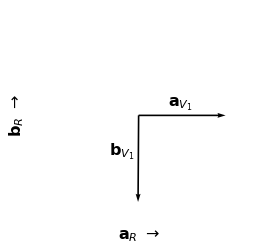

In [4]:
print(applythresh(rPv1))

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{V_1}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{V_1}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(1 q_3 0)_{V_1}$ & $(1 1 0)_{V_1}$

In [5]:
## Angle between (1 q3 0) and (110) pair
alpha1 = 180 - angleTBpair(rPv1,[1,q3,0],[1,1,0])
print('angle between (1 q3 0) and (110) pair: %.4f degrees' % alpha1)

angle between (1 q3 0) and (110) pair: 117.3403 degrees


#### $V_3$

Orientation relationship

| Variant Transformation | Twin Boundary |  Orientation Relationship  |
| ---------------------: | :-----------: | :------------------------: |
| $V_1 \to V_3$          |  $(1 1 0)_m$  | $\boldsymbol{m}_{(110)_m}$ |

In [6]:
## Orientation Relationship   rL: V₁ → V₃

#(1 1 0) compound twin
rL_v1tov3 = rotationmatrix([1,1,0] @ inv(rPv1), np.pi)

#Transformation relation: R ↔ V₃
rPv3 = rL_v1tov3 @ rPv1

## Append transformation matrix & del variables
rPv13241s.append(rPv1)
del rPv1

$V_3$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[-0.011127  0.995301  0.      ]
 [-0.999938 -0.004647  0.      ]
 [ 0.        0.        0.93503 ]]


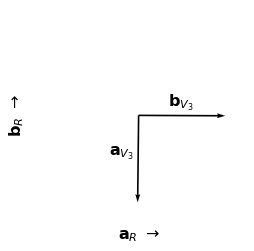

In [7]:
print(applythresh(rPv3))

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv3)

ax.text(-0.015,-0.02,r'$\mathbf{a}_{V_3}$',fontsize=16) #label vector a
ax.text(+0.015,+0.005,r'$\mathbf{b}_{V_3}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(1 1 0)_{V_3}$ & $(1 q_4 0)_{V_3}$

In [8]:
## Angle between (1 1 0) and (1 q4 0) pair
alpha3 = angleTBpair(rPv3,[1,1,0],[1,q4,0])
print('angle between (1 1 0) and (1 q4 0) pair: %.4f degrees' % alpha3)

angle between (1 1 0) and (1 q4 0) pair: 26.8827 degrees


#### $V_2$

Orientation relationship

| Variant Transformation | Twin Boundary |  Orientation Relationship  |
| ---------------------: | :-----------: | :------------------------: |
| $V_3 \to V_2$          |  $(1 q_4 0)_m$  | $\sim \boldsymbol{4}^+_{(001)_m}$ |

In [9]:
## Orientation Relationship   rL: V₃ → V₂

#(1 q4 0) NC twin
#OR_NCtwins(K1,eta1,rPm,am,plane normal is positive? (i.e. points to the twin?))
rL_v3tov2 = OR_NCtwins([1,q4,0],[-q4,1,0],rPv3,a,normal_pos=True)

#Transformation relation: R ↔ V₂
rPv2 = rL_v3tov2 @ rPv3

## Append transformation matrix & del variables
rPv13241s.append(rPv3)
del rPv3

$V_2$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[ 0.999817  0.012596  0.      ]
 [-0.019113  0.995232  0.      ]
 [ 0.        0.        0.93503 ]]


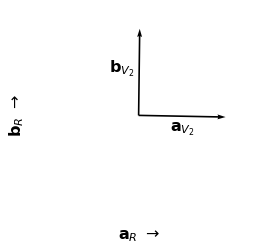

In [10]:
print(applythresh(rPv2))

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv2)

ax.text(+0.016,-0.008,r'$\mathbf{a}_{V_2}$',fontsize=16) #label vector a
ax.text(-0.015,0.022,r'$\mathbf{b}_{V_2}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(1 q_3 0)_{V_2}$ & $(\bar{1} \bar{1} 0)_{V_2}$

In [11]:
## alpha2: angle between (1 q3 0) and (-1 -1 0) pair
alpha2 = angleTBpair(rPv2,[1,q3,0],[-1,-1,0])
print('angle between (1 q3 0) and (-1 -1 0) pair: %.4f degrees' % alpha2)

angle between (1 q3 0) and (-1 -1 0) pair: 62.6597 degrees


#### $V_4$

Orientation relationship

| Variant Transformation | Twin Boundary |  Orientation Relationship  |
| ---------------------: | :-----------: | :------------------------: |
| $V_2 \to V_4$          |  $(\bar{1} \bar{1} 0)_m$  | $\boldsymbol{m}_{(\bar{1} \bar{1} 0)_m}$ |

In [12]:
## Orientation Relationship   rL: V₂ → V₄

#(-1 -1 0) compound twin
rL_v2tov4 = rotationmatrix([-1,-1,0] @ inv(rPv2), np.pi)

#Transformation relation: R ↔ V₄
rPv4 = rL_v2tov4 @ rPv2

## Append transformation matrix & del variables
rPv13241s.append(rPv2)
del rPv2

$V_4$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[ 0.007987  0.995208  0.      ]
 [ 0.999968 -0.014376  0.      ]
 [ 0.        0.       -0.93503 ]]


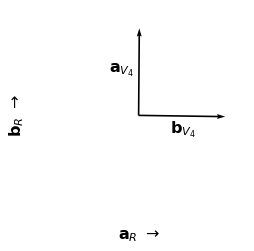

In [13]:
print(applythresh(rPv4))

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(-0.015,0.022,r'$\mathbf{a}_{V_4}$',fontsize=16) #label vector a
ax.text(+0.016,-0.009,r'$\mathbf{b}_{V_4}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(\bar{1} \bar{1} 0)_{V_4}$ & $(1 q_4 0)_{V_4}$

In [14]:
## Angle between (-1 -1 0) and (1 q4 0) pair
alpha4 = 180 - angleTBpair(rPv4,[-1,-1,0],[1,q4,0])
print('angle between (-1 -1 0) and (1 q4 0) pair: %.4f degrees' % alpha4)

angle between (-1 -1 0) and (1 q4 0) pair: 153.1173 degrees


### Sum of angles

In [15]:
sum_of_angles = alpha1 + alpha3 + alpha2 + alpha4
del alpha1, alpha3, alpha2, alpha4
print('sum of angles: %.4f degrees' % sum_of_angles)
print()

disclination_angle = sum_of_angles - 360
print('disclination angle: %.4f degrees' % disclination_angle)
del sum_of_angles

sum of angles: 360.0000 degrees

disclination angle: 0.0000 degrees


### Disclination character: Independent of sum of angles

We will compute sequential product of misorientation. So, we require one final transformation before computation

#### $V_1^*$

Orientation relationship

| Variant Transformation | Twin Boundary |  Orientation Relationship  |
| ---------------------: | :-----------: | :------------------------: |
| $V_4 \to V_1^*$          |  $(1 q_4 0)_m$  | $\sim \boldsymbol{4}^+_{(001)_m}$ |

In [16]:
## Orientation Relationship   rL: V₄ → V₁*

#(1 q4 0) NC twin
#OR_NCtwins(K1,eta1,rPm,am,plane normal is positive? (i.e. points to the twin?))
rL_v4tov1 = OR_NCtwins([1,q4,0],[-q4,1,0],rPv4,a,normal_pos=True)

#Transformation relation: R ↔ V₁*
rPv1s = rL_v4tov1 @ rPv4

## Append transformation matrix & del variables
rPv13241s.append(rPv4)
del rPv4

[[ 1.       -0.006427  0.      ]
 [ 0.       -0.995291  0.      ]
 [ 0.        0.       -0.93503 ]]


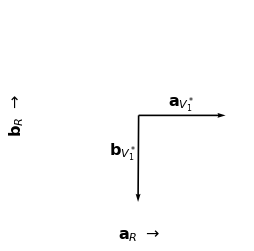

In [17]:
print(applythresh(rPv1s))

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv1s)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{V_1^*}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{V_1^*}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

In [18]:
## Append transformation matrix & del variables
rPv13241s.append(rPv1s)
del rPv1s

#### Product of Misorientation

In [19]:
# product of misorientation
PoM = rL_v4tov1 @ rL_v2tov4 @ rL_v3tov2 @ rL_v1tov3
del rL_v4tov1, rL_v2tov4, rL_v3tov2, rL_v1tov3

print('Misorientation across QL = ', applythresh(PoM))

Misorientation across QL =  [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Save Transformation Matrix of all Variants

In [20]:
## Save transformation matrix of all variants
#with open('rPv13241s.txt', 'w') as filehandle:
#    for listitem in rPv13241s:
#        filehandle.write('%s\n\n' % listitem)
#del rPv13241s